In [229]:
import numpy as np
import pandas as pd
import pycohort as pc
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from pandas import Series, DataFrame

# 1.0. First Method

In [173]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

df = pd.read_csv("orders.csv")
df = df.drop('Unnamed: 0', axis=1)

df.set_index('UserId', inplace=True)

df.OrderDate = pd.to_datetime(df.OrderDate, format="%Y-%m-%d")
df.PickupDate = pd.to_datetime(df.PickupDate, format="%Y-%m-%d")

df['OrderPeriod'] = df.OrderDate.apply(lambda x: x.strftime('%Y-%m'))

df['CohortGroup'] = df.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df = df.reset_index()

df2 = df.groupby(['CohortGroup', 'OrderPeriod'])\
        .agg({'UserId': pd.Series.nunique, 'OrderId': pd.Series.nunique, 'TotalCharges': np.sum})\
        .rename(columns={'UserId': 'TotalUser', 'OrderId': 'TotalOrders'})

df2 = df2.groupby(level=0).apply(cohort_period)

df2.head(3)

TotalUser  TotalOrders  TotalCharges  CohortPeriod
CohortGroup OrderPeriod                                                    
2009-01     2009-01             22           30      1850.255             1
            2009-02              8           25      1351.065             2
            2009-03             10           26      1357.360             3

In [174]:
df2 = df2.reset_index()
df2 = df2.set_index(['CohortGroup', 'CohortPeriod'])
gp = df2.TotalUser.groupby(level=0).first()

df2

OrderPeriod  TotalUser  TotalOrders  TotalCharges
CohortGroup CohortPeriod                                                  
2009-01     1                2009-01         22           30     1850.2550
            2                2009-02          8           25     1351.0650
            3                2009-03         10           26     1357.3600
            4                2009-04          9           28     1604.5000
            5                2009-05         10           26     1575.6250
...                              ...        ...          ...           ...
2010-01     2                2010-02         50          101     8453.1039
            3                2010-03         26           31     2238.6461
2010-02     1                2010-02        100          139     7374.7108
            2                2010-03         19           19      945.9633
2010-03     1                2010-03         24           26     1099.5471

[119 rows x 4 columns]

In [198]:
users = df2.TotalUser.unstack(0).divide(gp, axis=1)

In [206]:
users.T

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
CohortGroup,,,,,,,,,,,,,,,
2009-01,1.0,0.363636,0.454545,0.409091,0.454545,0.363636,0.363636,0.318182,0.318182,0.318182,0.318182,0.363636,0.500000,0.318182,0.272727
2009-02,1.0,0.200000,0.333333,0.066667,0.266667,0.266667,0.266667,0.333333,0.333333,0.266667,0.200000,0.200000,0.333333,NaN,NaN
2009-03,1.0,0.307692,0.384615,0.307692,0.076923,0.153846,0.153846,0.230769,0.153846,0.076923,0.230769,0.153846,0.076923,NaN,NaN
2009-04,1.0,0.333333,0.256410,0.333333,0.153846,0.179487,0.102564,0.153846,0.051282,0.102564,0.076923,0.051282,NaN,NaN,NaN
2009-05,1.0,0.260000,0.240000,0.100000,0.080000,0.120000,0.060000,0.100000,0.100000,0.080000,0.060000,NaN,NaN,NaN,NaN
2009-06,1.0,0.468750,0.281250,0.187500,0.218750,0.156250,0.093750,0.093750,0.312500,0.093750,NaN,NaN,NaN,NaN,NaN
2009-07,1.0,0.460000,0.260000,0.200000,0.220000,0.200000,0.220000,0.140000,0.140000,NaN,NaN,NaN,NaN,NaN,NaN
2009-08,1.0,0.354839,0.290323,0.225806,0.193548,0.258065,0.129032,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09,1.0,0.405405,0.378378,0.216216,0.351351,0.243243,0.216216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


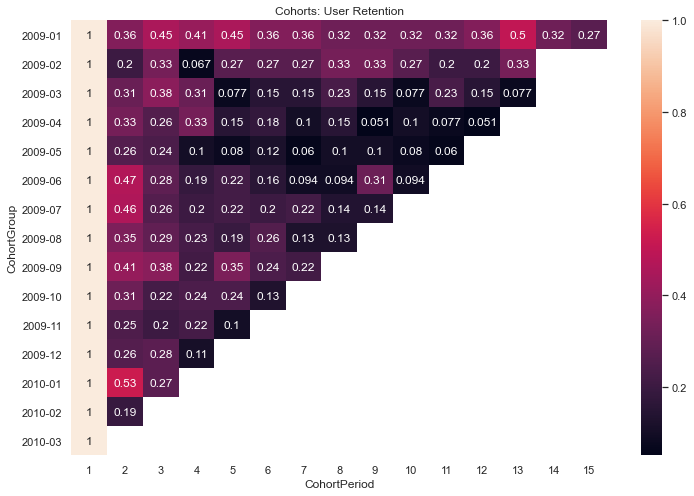

In [204]:
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(users.T, mask=users.T.isnull(), annot=True);

# 2.0. Second Method

In [218]:
df = pd.read_csv("orders.csv")
df = df.drop('Unnamed: 0', axis=1)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

df['CohortMonth'] = df.groupby('UserId')['OrderDate'].transform('min')

In [219]:
# create a date element function to get a series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

In [222]:
_,OrderMonth,OrderYear = get_date_elements(df,'OrderDate')
_,CohortMonth,CohortYear = get_date_elements(df,'CohortMonth')

In [223]:
#create a cohort index 
year_diff = OrderYear - CohortYear
month_diff = OrderMonth - CohortMonth
df['CohortIndex'] = year_diff*12+month_diff+1

In [227]:
cohort_data = df.groupby(['CohortMonth','CohortIndex'])['UserId'].apply(pd.Series.nunique).reset_index()
cohort_table = cohort_data.pivot(index='CohortMonth', columns=['CohortIndex'],values='UserId')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
CohortMonth,,,,,,,,,,,,,,,
2009-01-06,4.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
2009-01-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2009-01-12,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2009-01-13,4.0,2.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0
2009-01-14,3.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-03-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-04,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-05,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3.0. Third Method 

In [236]:
df = pd.read_csv("orders.csv")
df = df.drop('Unnamed: 0', axis=1)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['PickupDate'] = pd.to_datetime(df['PickupDate'])

In [239]:
df['metric_month'] = df['OrderDate'].dt.month
df['creation_date'] = df['OrderDate']
df['last_active_month'] = df['PickupDate'].dt.month
df['id'] = df['UserId']

In [240]:
# WTF
pc.cohort_preprocess(df)

CohortGroup,1970-01
CohortPeriod,
2,1.228700
3,0.672646
4,0.255605
5,0.354260
6,0.318386
7,0.461883
8,0.390135
9,0.412556
10,0.538117


# 4.0. Fourth Method

In [241]:
df = pd.read_csv("orders.csv")
df = df.drop('Unnamed: 0', axis=1)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['PickupDate'] = pd.to_datetime(df['PickupDate'])

In [242]:
df

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.6700,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.6000,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.7100,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.3800,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.2800,FFYHD,2,2009-02-09
...,...,...,...,...,...,...,...
2886,3220,2010-03-08,393616,60.0155,AWNXG,15,2010-03-08
2887,3192,2010-03-07,394290,45.4300,AKGQT,12,2010-03-10
2888,3193,2010-03-07,394346,14.2100,2B47R,15,2010-03-08
2889,3207,2010-03-08,395039,34.6200,H6E23,4,2010-03-08


In [243]:
df = pd.DataFrame(df.groupby(["OrderDate","UserId"]).agg({'UserId': pd.Series.nunique, 'OrderId': pd.Series.nunique, 'TotalCharges': np.sum})\
        .rename(columns={'UserId': 'TotalUser', 'OrderId': 'TotalOrders'})).reset_index()


In [244]:
df

,OrderDate,UserId,TotalUser,TotalOrders,TotalCharges
0,2009-01-06,253,1,1,57.5100
1,2009-01-06,1558,1,1,62.7400
2,2009-01-06,3190,1,1,35.4800
3,2009-01-06,3194,1,1,7.3700
4,2009-01-11,47,1,1,50.6700
...,...,...,...,...,...
2780,2010-03-08,380119,1,1,56.7115
2781,2010-03-08,393616,1,1,60.0155
2782,2010-03-08,395039,1,1,34.6200
2783,2010-03-08,396551,1,1,127.2800
